# **Uploading the Dataset**

# **Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pickle

# **Reading the Dataset and Standard Summary Statistics**

In [ ]:
df = pd.read_csv(r"E:\DEPI Project\sales_dataset.csv")

In [ ]:
df.describe()

Order ID    Units Sold     Unit Price      Unit Cost  \
count  9.945990e+05  9.945990e+05  994599.000000  994599.000000   
mean   5.493688e+08  4.477692e+05      92.474857      46.323549   
std    2.599414e+08  1.508199e+05      80.551447      50.328235   
min    1.000012e+08  9.300100e+04      13.500000       3.830000   
25%    3.239774e+08  3.439005e+05      27.270000       6.290000   
50%    5.487189e+08  4.144380e+05      74.650000      33.120000   
75%    7.746139e+08  5.144585e+05     109.970000      66.680000   
max    9.999999e+08  1.759186e+06     330.000000     227.310000   

       Total Revenue    Total Cost  Total Profit  
count   9.945990e+05  9.945990e+05  9.945990e+05  
mean    3.609370e+07  1.773078e+07  1.836292e+07  
std     2.969549e+07  1.875209e+07  1.170984e+07  
min     2.888710e+06  7.636766e+05  1.850556e+06  
25%     1.400434e+07  3.785686e+06  1.006361e+07  
50%     2.660794e+07  1.145205e+07  1.464189e+07  
75%     4.680453e+07  2.462405e+07  2.359062e+07  
max     2.278949e+08  1.432110e+08  1.091599e+08

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994599 entries, 0 to 994598
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Region          994599 non-null  object 
 1   Country         994599 non-null  object 
 2   Item Type       994599 non-null  object 
 3   Sales Channel   994599 non-null  object 
 4   Order Priority  994599 non-null  object 
 5   Order Date      994599 non-null  object 
 6   Order ID        994599 non-null  int64  
 7   Ship Date       994599 non-null  object 
 8   Units Sold      994599 non-null  int64  
 9   Unit Price      994599 non-null  float64
 10  Unit Cost       994599 non-null  float64
 11  Total Revenue   994599 non-null  float64
 12  Total Cost      994599 non-null  float64
 13  Total Profit    994599 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 106.2+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Ship Date']=pd.to_datetime(df['Ship Date'])
df['Order Date']=pd.to_datetime(df['Order Date'])

In [ ]:
df=df.drop_duplicates()

In [ ]:
df=df.sort_values(by='Order Date')

In [ ]:
df['Shipping Delay'] = (df['Ship Date'] - df['Order Date']).dt.days

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994599 entries, 402719 to 592151
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Region          994599 non-null  object        
 1   Country         994599 non-null  object        
 2   Item Type       994599 non-null  object        
 3   Sales Channel   994599 non-null  object        
 4   Order Priority  994599 non-null  object        
 5   Order Date      994599 non-null  datetime64[ns]
 6   Order ID        994599 non-null  int64         
 7   Ship Date       994599 non-null  datetime64[ns]
 8   Units Sold      994599 non-null  int64         
 9   Unit Price      994599 non-null  float64       
 10  Unit Cost       994599 non-null  float64       
 11  Total Revenue   994599 non-null  float64       
 12  Total Cost      994599 non-null  float64       
 13  Total Profit    994599 non-null  float64       
 14  Shipping Delay  994599 non-null  int

# **Feature Engineering**

**Creating the Modeling df then filtering the targeted items**

In [ ]:
df_modeling = df.copy()

In [ ]:
df_modeling = df_modeling[(df_modeling['Item Type']=='Cereal') | (df_modeling['Item Type']=='Cosmetics')].copy()

**Extracting Time Features from the Date**

In [ ]:
# Extract time-based features
df_modeling['Year'] = df_modeling['Order Date'].dt.year
df_modeling['Day'] = df_modeling['Order Date'].dt.day
df_modeling['DayOfWeek'] = df_modeling['Order Date'].dt.dayofweek         # Monday=0, Sunday=6
df_modeling['IsWeekend'] = df_modeling['DayOfWeek'].isin([5, 6]).astype(int)
df_modeling['Quarter'] = df_modeling['Order Date'].dt.quarter
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_modeling['Season'] = df_modeling['Month'].apply(get_season)

In [ ]:
df_modeling.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165744 entries, 23652 to 987972
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Region          165744 non-null  object        
 1   Country         165744 non-null  object        
 2   Item Type       165744 non-null  object        
 3   Sales Channel   165744 non-null  object        
 4   Order Priority  165744 non-null  object        
 5   Order Date      165744 non-null  datetime64[ns]
 6   Order ID        165744 non-null  int64         
 7   Ship Date       165744 non-null  datetime64[ns]
 8   Units Sold      165744 non-null  int64         
 9   Unit Price      165744 non-null  float64       
 10  Unit Cost       165744 non-null  float64       
 11  Total Revenue   165744 non-null  float64       
 12  Total Cost      165744 non-null  float64       
 13  Total Profit    165744 non-null  float64       
 14  Shipping Delay  165744 non-null  int6

**Encoding Categorical Features**

In [ ]:
# Encoding 'Season' as ordinal
season_mapping = {'Spring': 1, 'Summer': 2, 'Fall': 3, 'Winter': 4}
df_modeling['Season_Encoded'] = df_modeling['Season'].map(season_mapping)

# Encoding 'Order Priority' as ordinal
order_priority_mapping = {'L': 1, 'M': 2, 'H': 3, 'C': 4}
df_modeling['Order_Priority_Encoded'] = df_modeling['Order Priority'].map(order_priority_mapping)

# Encoding 'Sales Channel' as binary (Online=1, Offline=0)
df_modeling['Sales_Channel_Encoded'] = df_modeling['Sales Channel'].map({'Online': 1, 'Offline': 0})

# Drop original categorical columns if no longer needed
df_modeling.drop(['Season', 'Order Priority', 'Sales Channel'], axis=1, inplace=True)

In [ ]:
# Target encode 'Country' based on mean of target variable (Revenue per Unit)
country_encoding = df_modeling.groupby('Country')['Units Sold'].mean().to_dict()

# Apply the encoding to the 'Country' column
df_modeling['Country_encoded'] = df_modeling['Country'].map(country_encoding)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoding for Region
df_modeling = pd.get_dummies(df_modeling, columns=['Region'], drop_first=True)

In [ ]:
df_modeling.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165744 entries, 23652 to 987972
Data columns (total 28 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Country                                   165744 non-null  object        
 1   Item Type                                 165744 non-null  object        
 2   Order Date                                165744 non-null  datetime64[ns]
 3   Order ID                                  165744 non-null  int64         
 4   Ship Date                                 165744 non-null  datetime64[ns]
 5   Units Sold                                165744 non-null  int64         
 6   Unit Price                                165744 non-null  float64       
 7   Unit Cost                                 165744 non-null  float64       
 8   Total Revenue                             165744 non-null  float64       
 9   Total Cost      

In [ ]:
df_modeling.columns

Index(['Country', 'Item Type', 'Order Date', 'Order ID', 'Ship Date',
       'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost',
       'Total Profit', 'Shipping Delay', 'Month', 'Year', 'Day', 'DayOfWeek',
       'IsWeekend', 'Quarter', 'Season_Encoded', 'Order_Priority_Encoded',
       'Sales_Channel_Encoded', 'Country_encoded',
       'Region_Australia and Oceania',
       'Region_Central America and the Caribbean', 'Region_Europe',
       'Region_Middle East and North Africa', 'Region_North America',
       'Region_Sub-Saharan Africa'],
      dtype='object')

**Separate DataFrames for each item**

In [ ]:
# Filter by 'Beverages' and 'Meat' item types
df_cereal = df_modeling[df_modeling['Item Type'] == 'Cereal'].copy()
df_cosmetics = df_modeling[df_modeling['Item Type'] == 'Cosmetics'].copy()

In [ ]:
df_cereal.head()

Country Item Type Order Date   Order ID  Ship Date  Units Sold  \
736040         Spain    Cereal 2010-01-01  423045575 2010-02-06      450118   
805991  Turkmenistan    Cereal 2010-01-01  961384665 2010-02-02      440837   
811089      Tunisia     Cereal 2010-01-01  576856744 2010-02-05      342209   
499459       Austria    Cereal 2010-01-01  140454900 2010-02-01      390247   
465060      Tunisia     Cereal 2010-01-01  576856744 2010-02-05      505182   

        Unit Price  Unit Cost  Total Revenue  Total Cost  ...  Season_Encoded  \
736040       23.59       4.26    10618283.62  1917502.68  ...               4   
805991       26.49       5.16    11677772.13  2274718.92  ...               4   
811089       24.78       4.88     8479939.02  1669979.92  ...               4   
499459       26.77       5.50    10446912.19  2146358.50  ...               4   
465060       22.82       5.21    11528253.24  2631998.22  ...               4   

        Order_Priority_Encoded  Sales_Channel_Encoded  Country_encoded  \
736040                       3                      0    447853.432819   
805991                       4                      0    435056.444317   
811089                       2                      1    440852.348115   
499459                       4                      0    434433.447398   
465060                       2                      1    440852.348115   

        Region_Australia and Oceania  \
736040                         False   
805991                         False   
811089                         False   
499459                         False   
465060                         False   

        Region_Central America and the Caribbean  Region_Europe  \
736040                                     False           True   
805991                                     False          False   
811089                                     False          False   
499459                                     False           True   
465060                                     False          False   

        Region_Middle East and North Africa  Region_North America  \
736040                                False                 False   
805991                                False                 False   
811089                                 True                 False   
499459                                False                 False   
465060                                 True                 False   

        Region_Sub-Saharan Africa  
736040                      False  
805991                      False  
811089                      False  
499459                      False  
465060                      False  

[5 rows x 28 columns]

**Adding Rolling Averages and Lags**

In [ ]:
df_cereal = df_cereal.sort_values('Order Date')
df_cereal.set_index('Order Date', inplace=True)

In [ ]:
df_cereal['Rolling_7D'] = df_cereal['Units Sold'].rolling('7D').mean()

In [ ]:
monthly_df = df_cereal['Units Sold'].resample('ME').sum().to_frame()
monthly_df['Lag_1'] = monthly_df['Units Sold'].shift(1)
monthly_df['Lag_3'] = monthly_df['Units Sold'].shift(3)
monthly_df['Lag_6'] = monthly_df['Units Sold'].shift(6)
monthly_df['Lag_12'] = monthly_df['Units Sold'].shift(12)

monthly_df['Rolling_1M'] = monthly_df['Units Sold'].rolling(1).mean()
monthly_df['Rolling_3M'] = monthly_df['Units Sold'].rolling(3).mean()
monthly_df['Rolling_6M'] = monthly_df['Units Sold'].rolling(6).mean()
monthly_df['Rolling_12M'] = monthly_df['Units Sold'].rolling(12).mean()

In [ ]:
df_cereal['YearMonth'] = df_cereal.index.to_period('M')
monthly_df['YearMonth'] = monthly_df.index.to_period('M')
df_cereal = df_cereal.reset_index().merge(monthly_df, on='YearMonth', how='left').set_index('Order Date')

In [ ]:
df_cereal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 82756 entries, 2010-01-01 to 2017-07-29
Data columns (total 38 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Country                                   82756 non-null  object        
 1   Item Type                                 82756 non-null  object        
 2   Order ID                                  82756 non-null  int64         
 3   Ship Date                                 82756 non-null  datetime64[ns]
 4   Units Sold_x                              82756 non-null  int64         
 5   Unit Price                                82756 non-null  float64       
 6   Unit Cost                                 82756 non-null  float64       
 7   Total Revenue                             82756 non-null  float64       
 8   Total Cost                                82756 non-null  float64       
 9   Total Profi

In [ ]:
# Drop rows with NaNs created by lag/rolling features
df_cereal = df_cereal.dropna().reset_index(drop=False)

In [ ]:
df_cosmetics = df_cosmetics.sort_values('Order Date')
df_cosmetics.set_index('Order Date', inplace=True)

In [ ]:
df_cosmetics['Rolling_7D'] = df_cosmetics['Units Sold'].rolling('7D').mean()

In [ ]:
monthly_df = df_cosmetics['Units Sold'].resample('ME').sum().to_frame()
monthly_df['Lag_1'] = monthly_df['Units Sold'].shift(1)
monthly_df['Lag_3'] = monthly_df['Units Sold'].shift(3)
monthly_df['Lag_6'] = monthly_df['Units Sold'].shift(6)
monthly_df['Lag_12'] = monthly_df['Units Sold'].shift(12)

monthly_df['Rolling_1M'] = monthly_df['Units Sold'].rolling(1).mean()
monthly_df['Rolling_3M'] = monthly_df['Units Sold'].rolling(3).mean()
monthly_df['Rolling_6M'] = monthly_df['Units Sold'].rolling(6).mean()
monthly_df['Rolling_12M'] = monthly_df['Units Sold'].rolling(12).mean()

In [ ]:
df_cosmetics['YearMonth'] = df_cosmetics.index.to_period('M')
monthly_df['YearMonth'] = monthly_df.index.to_period('M')
df_cosmetics = df_cosmetics.reset_index().merge(monthly_df, on='YearMonth', how='left').set_index('Order Date')

In [ ]:
df_cosmetics.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 82988 entries, 2010-01-01 to 2017-07-29
Data columns (total 38 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Country                                   82988 non-null  object        
 1   Item Type                                 82988 non-null  object        
 2   Order ID                                  82988 non-null  int64         
 3   Ship Date                                 82988 non-null  datetime64[ns]
 4   Units Sold_x                              82988 non-null  int64         
 5   Unit Price                                82988 non-null  float64       
 6   Unit Cost                                 82988 non-null  float64       
 7   Total Revenue                             82988 non-null  float64       
 8   Total Cost                                82988 non-null  float64       
 9   Total Profi

In [ ]:
# Drop rows with NaNs created by lag/rolling features
df_cosmetics = df_cosmetics.dropna().reset_index(drop=False)

In [ ]:
df_cereal.columns

Index(['Order Date', 'Country', 'Item Type', 'Order ID', 'Ship Date',
       'Units Sold_x', 'Unit Price', 'Unit Cost', 'Total Revenue',
       'Total Cost', 'Total Profit', 'Shipping Delay', 'Month', 'Year', 'Day',
       'DayOfWeek', 'IsWeekend', 'Quarter', 'Season_Encoded',
       'Order_Priority_Encoded', 'Sales_Channel_Encoded', 'Country_encoded',
       'Region_Australia and Oceania',
       'Region_Central America and the Caribbean', 'Region_Europe',
       'Region_Middle East and North Africa', 'Region_North America',
       'Region_Sub-Saharan Africa', 'Rolling_7D', 'YearMonth', 'Units Sold_y',
       'Lag_1', 'Lag_3', 'Lag_6', 'Lag_12', 'Rolling_1M', 'Rolling_3M',
       'Rolling_6M', 'Rolling_12M'],
      dtype='object')

In [ ]:
df_cosmetics.columns

Index(['Order Date', 'Country', 'Item Type', 'Order ID', 'Ship Date',
       'Units Sold_x', 'Unit Price', 'Unit Cost', 'Total Revenue',
       'Total Cost', 'Total Profit', 'Shipping Delay', 'Month', 'Year', 'Day',
       'DayOfWeek', 'IsWeekend', 'Quarter', 'Season_Encoded',
       'Order_Priority_Encoded', 'Sales_Channel_Encoded', 'Country_encoded',
       'Region_Australia and Oceania',
       'Region_Central America and the Caribbean', 'Region_Europe',
       'Region_Middle East and North Africa', 'Region_North America',
       'Region_Sub-Saharan Africa', 'Rolling_7D', 'YearMonth', 'Units Sold_y',
       'Lag_1', 'Lag_3', 'Lag_6', 'Lag_12', 'Rolling_1M', 'Rolling_3M',
       'Rolling_6M', 'Rolling_12M'],
      dtype='object')

In [ ]:
# Dropping the duplicate column
df_cereal = df_cereal.drop(columns=['Units Sold_y'])

# Renaming 'Units Sold_x' to 'Units Sold'
df_cereal = df_cereal.rename(columns={'Units Sold_x': 'Units Sold'})

df_cosmetics = df_cosmetics.drop(columns=['Units Sold_y'])
df_cosmetics = df_cosmetics.rename(columns={'Units Sold_x': 'Units Sold'})

In [ ]:
df_cereal = df_cereal.drop(columns=['YearMonth'])
df_cosmetics = df_cosmetics.drop(columns=['YearMonth'])

In [ ]:
df_cereal.columns

Index(['Order Date', 'Country', 'Item Type', 'Order ID', 'Ship Date',
       'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost',
       'Total Profit', 'Shipping Delay', 'Month', 'Year', 'Day', 'DayOfWeek',
       'IsWeekend', 'Quarter', 'Season_Encoded', 'Order_Priority_Encoded',
       'Sales_Channel_Encoded', 'Country_encoded',
       'Region_Australia and Oceania',
       'Region_Central America and the Caribbean', 'Region_Europe',
       'Region_Middle East and North Africa', 'Region_North America',
       'Region_Sub-Saharan Africa', 'Rolling_7D', 'Lag_1', 'Lag_3', 'Lag_6',
       'Lag_12', 'Rolling_1M', 'Rolling_3M', 'Rolling_6M', 'Rolling_12M'],
      dtype='object')

In [ ]:
drop_columns = ['Order Date','Country', 'Item Type', 'Order ID', 'Ship Date', 'Total Revenue', 'Total Cost',
       'Total Profit' ]

In [ ]:
# Dropping unnecessary columns for each item type dataset
df_cereal_cleaned = df_cereal.drop(columns=drop_columns)
df_cosmetics_cleaned = df_cosmetics.drop(columns=drop_columns)

In [ ]:
df_cereal_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Units Sold                                71810 non-null  int64  
 1   Unit Price                                71810 non-null  float64
 2   Unit Cost                                 71810 non-null  float64
 3   Shipping Delay                            71810 non-null  int64  
 4   Month                                     71810 non-null  int32  
 5   Year                                      71810 non-null  int32  
 6   Day                                       71810 non-null  int32  
 7   DayOfWeek                                 71810 non-null  int32  
 8   IsWeekend                                 71810 non-null  int32  
 9   Quarter                                   71810 non-null  int32  
 10  Season_Encoded                    

# **Modeling**

**Train Test Split**

In [ ]:
# Computing 80% split index
split_idx_cereal = int(len(df_cereal_cleaned) * 0.8)
split_idx_cosmetics = int(len(df_cosmetics_cleaned) * 0.8)

# Creating time-based splits
X_train_cereal = df_cereal_cleaned.iloc[:split_idx_cereal].drop(columns='Units Sold')
y_train_cereal = df_cereal.iloc[:split_idx_cereal]['Units Sold']

X_test_cereal = df_cereal_cleaned.iloc[split_idx_cereal:].drop(columns='Units Sold')
y_test_cereal = df_cereal.iloc[split_idx_cereal:]['Units Sold']

X_train_cosmetics = df_cosmetics_cleaned.iloc[:split_idx_cosmetics].drop(columns='Units Sold')
y_train_cosmetics = df_cosmetics.iloc[:split_idx_cosmetics]['Units Sold']

X_test_cosmetics = df_cosmetics_cleaned.iloc[split_idx_cosmetics:].drop(columns='Units Sold')
y_test_cosmetics = df_cosmetics.iloc[split_idx_cosmetics:]['Units Sold']

In [ ]:
X_test_cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14362 entries, 57448 to 71809
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unit Price                                14362 non-null  float64
 1   Unit Cost                                 14362 non-null  float64
 2   Shipping Delay                            14362 non-null  int64  
 3   Month                                     14362 non-null  int32  
 4   Year                                      14362 non-null  int32  
 5   Day                                       14362 non-null  int32  
 6   DayOfWeek                                 14362 non-null  int32  
 7   IsWeekend                                 14362 non-null  int32  
 8   Quarter                                   14362 non-null  int32  
 9   Season_Encoded                            14362 non-null  int64  
 10  Order_Priority_Encoded        

In [ ]:
print("Cereal:")
print("Train date range:", df_cereal['Order Date'].iloc[:split_idx_cereal].min(), "to", df_cereal['Order Date'].iloc[:split_idx_cereal].max())
print("Test date range :", df_cereal['Order Date'].iloc[split_idx_cereal:].min(), "to", df_cereal['Order Date'].iloc[split_idx_cereal:].max())

print("\nCosmetics:")
print("Train date range:", df_cosmetics['Order Date'].iloc[:split_idx_cosmetics].min(), "to", df_cosmetics['Order Date'].iloc[:split_idx_cosmetics].max())
print("Test date range :", df_cosmetics['Order Date'].iloc[split_idx_cosmetics:].min(), "to", df_cosmetics['Order Date'].iloc[split_idx_cosmetics:].max())


Cereal:
Train date range: 2011-01-01 00:00:00 to 2016-04-05 00:00:00
Test date range : 2016-04-05 00:00:00 to 2017-07-29 00:00:00

Cosmetics:
Train date range: 2011-01-01 00:00:00 to 2016-04-04 00:00:00
Test date range : 2016-04-04 00:00:00 to 2017-07-29 00:00:00


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Train Validation Split**

In [ ]:
train_size = int(len(X_train_cereal) * 0.8)  # 80% for training, 20% for validation

# Training set
X_train_ts, y_train_ts = X_train_cereal[:train_size], y_train_cereal[:train_size]

# Validation set
X_val_ts, y_val_ts = X_train_cereal[train_size:], y_train_cereal[train_size:]

**Tuning the number of decision trees for random forest**

In [ ]:
r2_scores = []

for n in [10, 50, 100, 200, 300, 500, 1000]:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    model.fit(X_train_ts, y_train_ts)
    preds = model.predict(X_val_ts)
    r2_scores.append(r2_score(y_val_ts, preds))


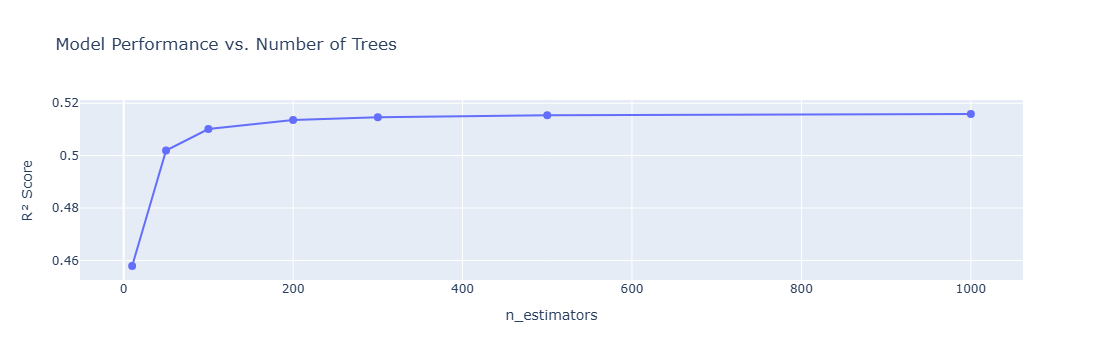

In [ ]:
n_estimators = [10, 50, 100, 200, 300, 500, 1000]

# Creating the plot
fig = go.Figure()

fig.add_trace(go.Scatter(x=n_estimators, y=r2_scores, mode='markers+lines',
                         marker=dict(symbol='circle', size=8), line=dict(shape='linear')))

# Setting the labels and title
fig.update_layout(
    title='Model Performance vs. Number of Trees',
    xaxis_title='n_estimators',
    yaxis_title='R² Score',
    template='plotly',
    showlegend=False
)

# Showing the plot
fig.show()

**Experimenting with XGBoost and finding the best iteration**

In [ ]:
import xgboost as xgb
from xgboost.callback import EarlyStopping

In [ ]:
# Convert data to DMatrix format
dtrain = xgb.DMatrix(X_train_cereal, label=y_train_cereal)
dval = xgb.DMatrix(X_val_ts, label=y_val_ts)

# Params
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.05,
    'max_depth': 6,
    'seed': 42,
    'eval_metric': 'rmse'
}

# Evaluation set
evals = [(dtrain, 'train'), (dval, 'eval')]

# Prepare an empty dict to store results
evals_result = {}

# Train with early stopping and tracking
model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=50,
    evals_result=evals_result,
    verbose_eval=False
)

# Get best iteration
best_iteration = model.best_iteration
print(f"Best iteration: {best_iteration}")

# Predict
y_pred = model.predict(dval)

# Metrics
r2 = r2_score(y_val_ts, y_pred)
mse = mean_squared_error(y_val_ts, y_pred)
rmse = np.sqrt(mean_squared_error(y_val_ts, y_pred))
print(f"R² Score: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

Best iteration: 999
R² Score: 0.6879478609461303
MSE: 3715185029.54044
RMSE: 60952.31767160655


**Feature Importance and Learning Curve**

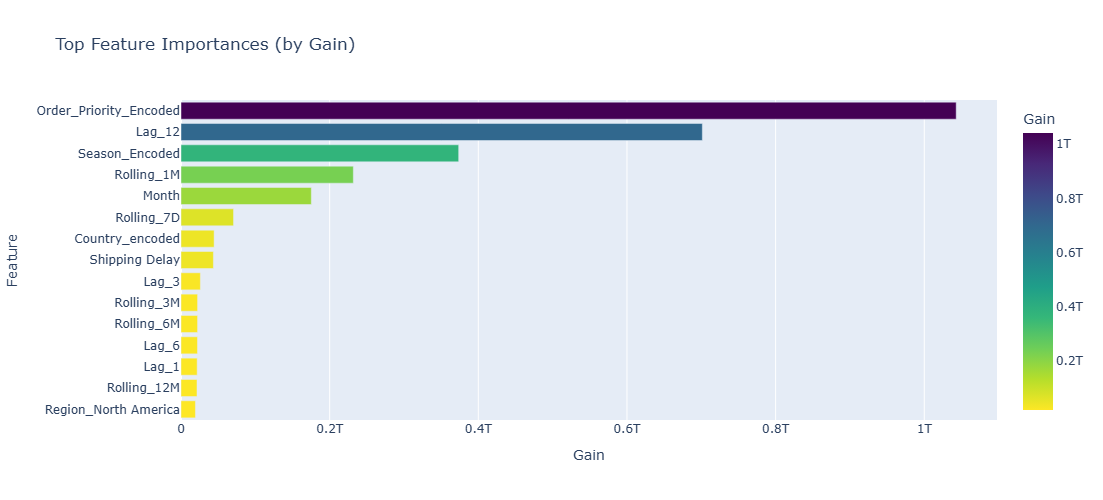

In [ ]:
# Get feature importance from booster
importance_dict = model.get_score(importance_type='gain')

# Convert to DataFrame
importance_df = pd.DataFrame({
    'Feature': list(importance_dict.keys()),
    'Gain': list(importance_dict.values())
})

# Sort by gain
importance_df = importance_df.sort_values(by='Gain', ascending=False)

# Plot
fig = px.bar(importance_df.head(15), x='Gain', y='Feature', orientation='h',
             title='Top Feature Importances (by Gain)', color='Gain', color_continuous_scale='Viridis_r')
fig.update_layout(yaxis={'categoryorder':'total ascending'}, height=500)
fig.show()

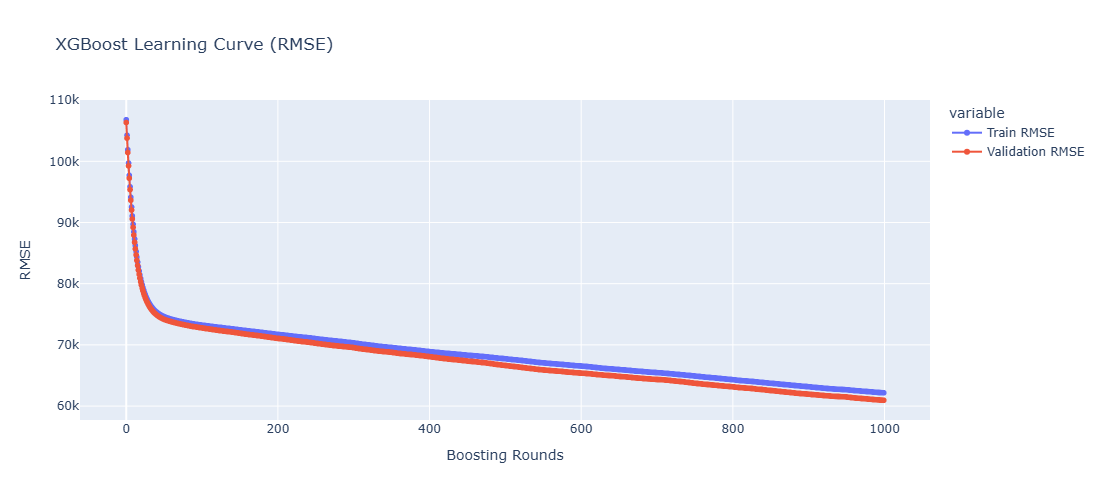

In [ ]:
# Extract eval results (from evals_result)
results = evals_result

# Create DataFrame for plotting
df_learning = pd.DataFrame({
    'Round': list(range(len(results['train']['rmse']))),
    'Train RMSE': results['train']['rmse'],
    'Validation RMSE': results['eval']['rmse']
})

# Plot learning curve
fig2 = px.line(df_learning, x='Round', y=['Train RMSE', 'Validation RMSE'],
               title='XGBoost Learning Curve (RMSE)', markers=True)
fig2.update_layout(yaxis_title='RMSE', xaxis_title='Boosting Rounds', height=500)
fig2.show()

# **Fitting the Model to the Cereal DataFrame**

In [ ]:
# Define the XGBoost Regressor
xgb_model_cereal = xgb.XGBRegressor(
    n_estimators=1000,       # Use the best number of trees from previous tuning
    learning_rate=0.05,      # Optimal learning rate based on previous tests
    random_state=42
)

# Fit the model to the training data
xgb_model_cereal.fit(X_train_cereal, y_train_cereal)
# Save model and feature names
data_to_save = {
    'model': xgb_model_cereal,
    'feature_names': X_train_cereal.columns.tolist()
}

with open("xgb_model_with_cereal_features.pkl", "wb") as f:
    pickle.dump(data_to_save, f)

# Make predictions on the test data
y_pred_test_cereal = xgb_model_cereal.predict(X_test_cereal)

In [ ]:
# Calculate R² Score for the test data
r2_test = r2_score(y_test_cereal, y_pred_test_cereal)
print(f'R² Score on Test Data: {r2_test:.3f}')

# Calculate Mean Squared Error for the test data
mse_test = mean_squared_error(y_test_cereal, y_pred_test_cereal)
print(f'Mean Squared Error on Test Data: {mse_test:.3f}')

# Calculate Root Mean Squared Error (RMSE) for the test data
rmse_test = np.sqrt(mse_test)
print(f'Root Mean Squared Error (RMSE) on Test Data: {rmse_test:.3f}')

R² Score on Test Data: 0.476
Mean Squared Error on Test Data: 5951919769.284
Root Mean Squared Error (RMSE) on Test Data: 77148.686


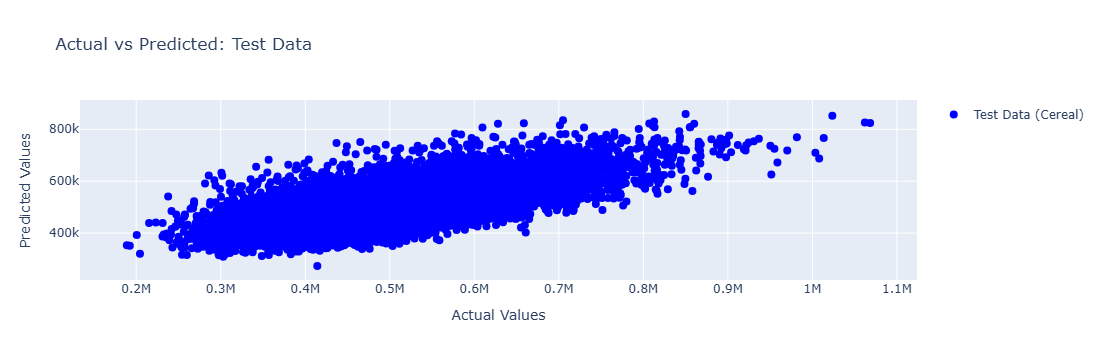

In [ ]:
# Actual vs Predicted Plot
fig_actual_vs_pred = go.Figure()

fig_actual_vs_pred.add_trace(go.Scatter(
    x=y_test_cereal, y=y_pred_test_cereal, mode='markers',
    name='Test Data (Cereal)', marker=dict(color='blue', size=8)
))

fig_actual_vs_pred.update_layout(
    title="Actual vs Predicted: Test Data",
    xaxis_title="Actual Values",
    yaxis_title="Predicted Values",
    showlegend=True
)

fig_actual_vs_pred.show()

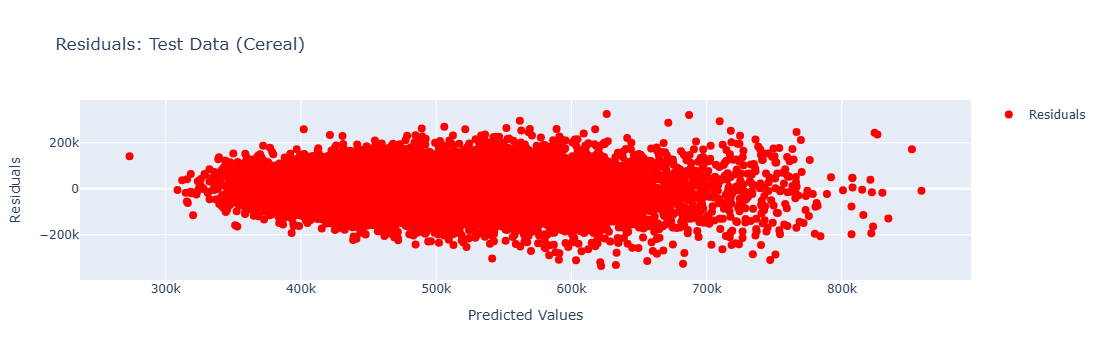

In [ ]:
# Residuals Plot
residuals_cereal = y_test_cereal - y_pred_test_cereal

fig_residuals = go.Figure()

fig_residuals.add_trace(go.Scatter(
    x=y_pred_test_cereal, y=residuals_cereal, mode='markers',
    name='Residuals', marker=dict(color='red', size=8)
))

fig_residuals.update_layout(
    title="Residuals: Test Data (Cereal)",
    xaxis_title="Predicted Values",
    yaxis_title="Residuals",
    showlegend=True
)

fig_residuals.show()


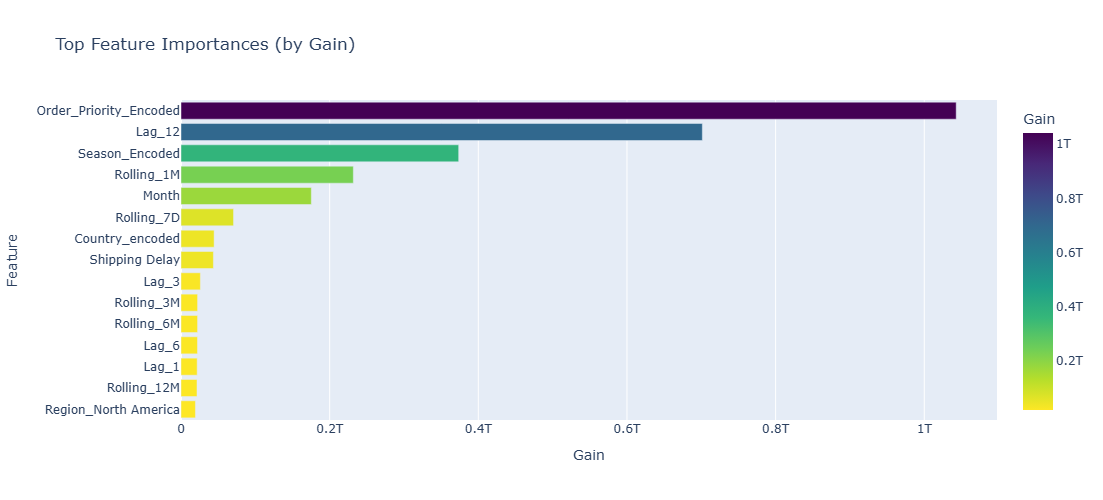

In [ ]:
# Get feature importance from booster using 'gain'
importance_dict = xgb_model_cereal.get_booster().get_score(importance_type='gain')

# Convert to DataFrame
importance_df = pd.DataFrame({
    'Feature': list(importance_dict.keys()),
    'Gain': list(importance_dict.values())
})

# Sort by gain in descending order
importance_df = importance_df.sort_values(by='Gain', ascending=False)

# Plot top 15 features
fig = px.bar(importance_df.head(15), x='Gain', y='Feature', orientation='h',
             title='Top Feature Importances (by Gain)', color='Gain', color_continuous_scale='Viridis_r')

# Update layout
fig.update_layout(yaxis={'categoryorder': 'total ascending'}, height=500)
fig.show()

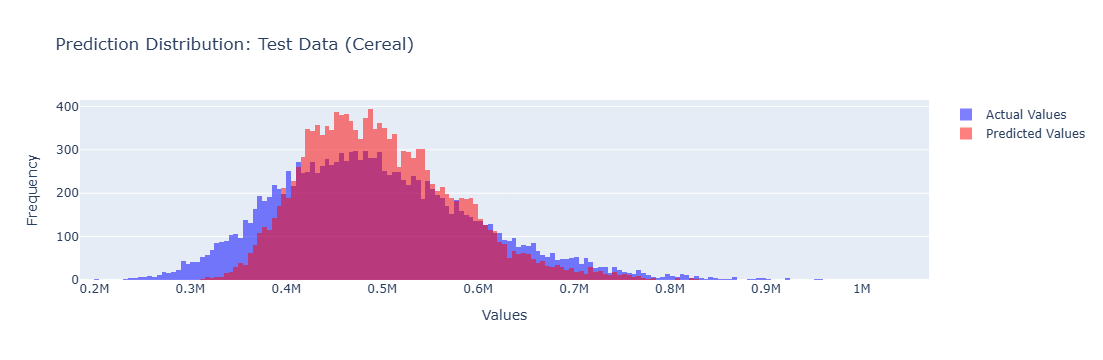

In [ ]:
# Prediction Distribution
fig_pred_dist = go.Figure()

fig_pred_dist.add_trace(go.Histogram(
    x=y_test_cereal, opacity=0.5, name='Actual Values',
    marker=dict(color='blue')
))

fig_pred_dist.add_trace(go.Histogram(
    x=y_pred_test_cereal, opacity=0.5, name='Predicted Values',
    marker=dict(color='red')
))

fig_pred_dist.update_layout(
    title="Prediction Distribution: Test Data (Cereal)",
    xaxis_title="Values",
    yaxis_title="Frequency",
    barmode='overlay',
    showlegend=True
)

fig_pred_dist.show()


# **Fitting the Model to the Cosmetics DataFrame**

In [ ]:
# Define the XGBoost Regressor
xgb_model_cosmetics = xgb.XGBRegressor(
    n_estimators=1000,       # Use the best number of trees from previous tuning
    learning_rate=0.05,      # Optimal learning rate based on previous tests
    random_state=42
)

# Fit the model to the training data
xgb_model_cosmetics.fit(X_train_cosmetics, y_train_cosmetics)
# Save model and feature names
data_to_save = {
    'model': xgb_model_cosmetics,
    'feature_names': X_train_cosmetics.columns.tolist()
}

with open("xgb_model_with_cosmetics_features.pkl", "wb") as f:
    pickle.dump(data_to_save, f)
# Make predictions on the test data
y_pred_test_cosmetics = xgb_model_cosmetics.predict(X_test_cosmetics)

In [ ]:
# Calculate R² Score for the test data
r2_test_cosmetics = r2_score(y_test_cosmetics, y_pred_test_cosmetics)
print(f'R² Score on Test Data: {r2_test_cosmetics:.3f}')

# Calculate Mean Squared Error for the test data
mse_test_cosmetics = mean_squared_error(y_test_cosmetics, y_pred_test_cosmetics)
print(f'Mean Squared Error on Test Data: {mse_test_cosmetics:.3f}')

# Calculate Root Mean Squared Error (RMSE) for the test data
rmse_test_cosmetics = np.sqrt(mse_test)
print(f'Root Mean Squared Error (RMSE) on Test Data: {rmse_test_cosmetics:.3f}')

R² Score on Test Data: 0.453
Mean Squared Error on Test Data: 3599717566.224
Root Mean Squared Error (RMSE) on Test Data: 77148.686


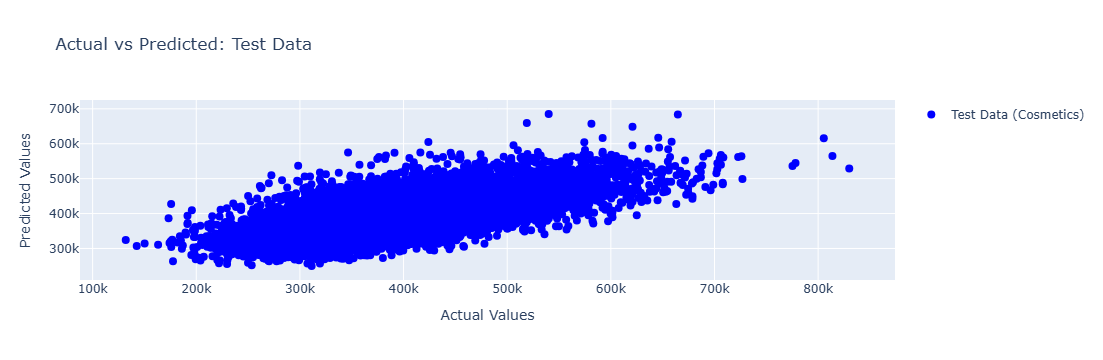

In [ ]:
# Actual vs Predicted Plot
fig_actual_vs_pred = go.Figure()

fig_actual_vs_pred.add_trace(go.Scatter(
    x=y_test_cosmetics, y=y_pred_test_cosmetics, mode='markers',
    name='Test Data (Cosmetics)', marker=dict(color='blue', size=8)
))

fig_actual_vs_pred.update_layout(
    title="Actual vs Predicted: Test Data",
    xaxis_title="Actual Values",
    yaxis_title="Predicted Values",
    showlegend=True
)

fig_actual_vs_pred.show()

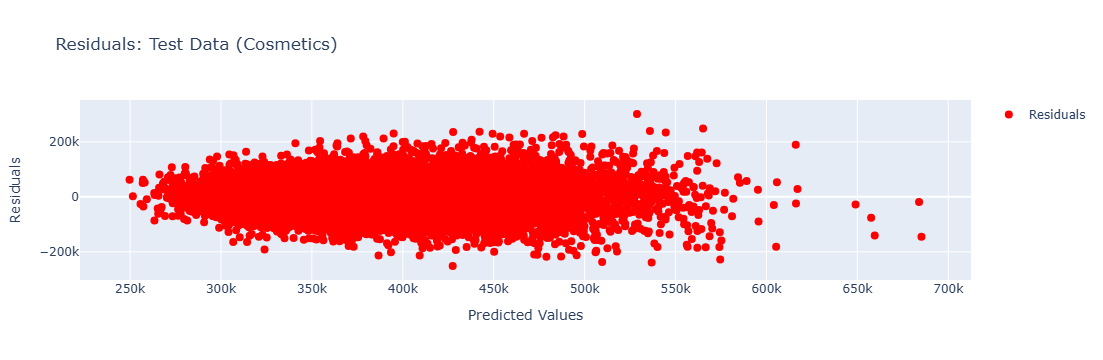

In [ ]:
# Residuals Plot
residuals_cosmetics = y_test_cosmetics - y_pred_test_cosmetics

fig_residuals = go.Figure()

fig_residuals.add_trace(go.Scatter(
    x=y_pred_test_cosmetics, y=residuals_cosmetics, mode='markers',
    name='Residuals', marker=dict(color='red', size=8)
))

fig_residuals.update_layout(
    title="Residuals: Test Data (Cosmetics)",
    xaxis_title="Predicted Values",
    yaxis_title="Residuals",
    showlegend=True
)

fig_residuals.show()


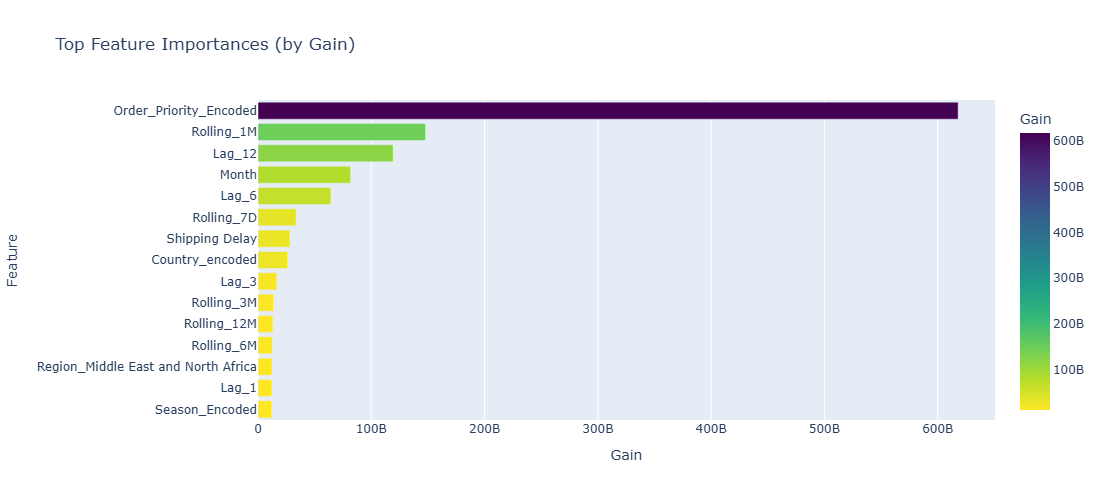

In [ ]:
# Get feature importance from booster using 'gain'
importance_dict = xgb_model_cosmetics.get_booster().get_score(importance_type='gain')

# Convert to DataFrame
importance_df = pd.DataFrame({
    'Feature': list(importance_dict.keys()),
    'Gain': list(importance_dict.values())
})

# Sort by gain in descending order
importance_df = importance_df.sort_values(by='Gain', ascending=False)

# Plot top 15 features
fig = px.bar(importance_df.head(15), x='Gain', y='Feature', orientation='h',
             title='Top Feature Importances (by Gain)', color='Gain', color_continuous_scale='Viridis_r')

# Update layout
fig.update_layout(yaxis={'categoryorder': 'total ascending'}, height=500)
fig.show()

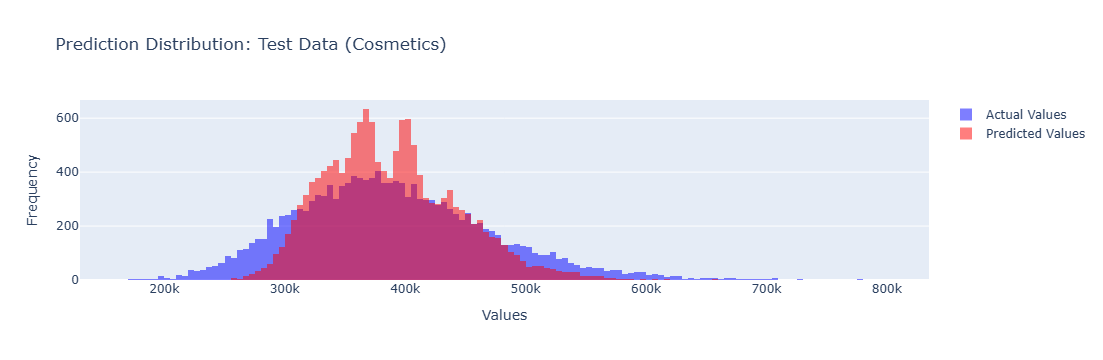

In [ ]:
# Prediction Distribution
fig_pred_dist = go.Figure()

fig_pred_dist.add_trace(go.Histogram(
    x=y_test_cosmetics, opacity=0.5, name='Actual Values',
    marker=dict(color='blue')
))

fig_pred_dist.add_trace(go.Histogram(
    x=y_pred_test_cosmetics, opacity=0.5, name='Predicted Values',
    marker=dict(color='red')
))

fig_pred_dist.update_layout(
    title="Prediction Distribution: Test Data (Cosmetics)",
    xaxis_title="Values",
    yaxis_title="Frequency",
    barmode='overlay',
    showlegend=True
)

fig_pred_dist.show()


In [ ]:
import joblib
joblib.dump(xgb_model_cosmetics, 'xgboost_cosmetics.pkl')

['xgboost_cosmetics.pkl']

In [ ]:
joblib.dump(xgb_model_cereal, 'xgboost_cereal.pkl')

['xgboost_cereal.pkl']